In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

from scipy.stats import gamma as Gamma
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import expon

import seaborn as sns

from scipy.special import kolmogorov, erf
from scipy.special import gamma, factorial
from scipy.optimize import minimize

# Case 1 

% Case 1: fully synthetic case
Mdata = 1e3;
mu = 2; sigma = 1;
tau1 = exprnd(lognrnd(mu,sigma,1,Mdata));
figure(1), histogram(tau1,40,'binlimits',[0 100]);
title('Case 1: fully synthetic case');

% Q1: tau1 is now exactly ~Exp(logN(mu,sigma)). Given data tau1, can
% we find a good estimate lambda1 ~ logN(mu,sigma)?
%
% Partial answer:
% https://en.wikipedia.org/wiki/Exponential_distribution#Bayesian_inference

In [2]:
Mdata = 1000
mu = 2
sigma = 1
tau1 = np.zeros((1, Mdata))

lamda = lognorm(mu,sigma).rvs(size=(1,Mdata))

for i in range(Mdata):
    tau1[0,i] = expon(lamda[0,i]).rvs(size=1)

(0.0, 100.0)

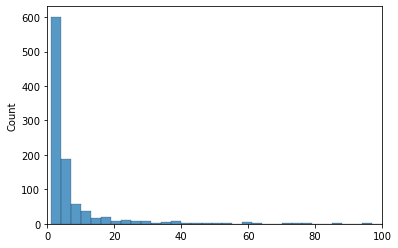

In [3]:
sns.histplot(tau1[0],  binwidth=3)
plt.xlim(0,100)

In [4]:
print("mean: ", np.mean(tau1))
print("std: ", np.std(tau1))

mean:  9.41136126792639
std:  31.04563691857356


Text(0.5, 1.0, 'Zoom-in, data $\\tau$ distribution')

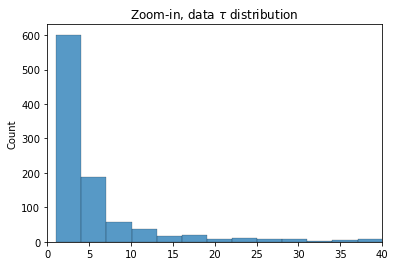

In [5]:
sns.histplot(tau1[0],  binwidth=3)
plt.xlim(0,40)
plt.title(r"Zoom-in, data $\tau$ distribution")

Text(0.5, 1.0, 'Parameters $\\lambda$ distribution')

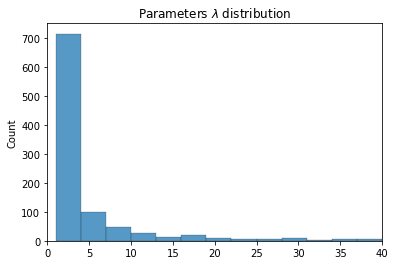

In [6]:
sns.histplot(lamda[0],  binwidth=3)
plt.xlim(0,40)
plt.title(r"Parameters $\lambda$ distribution")

In [7]:
print("mean: ", np.mean(lamda))
print("std: ", np.std(lamda))

mean:  8.38604494653534
std:  31.065280928155104


In [8]:
def Gamma_density(x, alpha, beta):
    p = beta**alpha/gamma(alpha)*(x**(alpha-1))*np.exp(-x*beta)
    return p

In [9]:
def LogLikelihood(params, data=[], func=Gamma_density):  
    alpha, beta = params
    l = np.sum(np.log(func(data, alpha, beta)))
    #print(l, params)
    return l

In [10]:
def Maximize_LogLikelihood(params, data=[], func=Gamma_density):
    return -LogLikelihood(params, data, func)

In [11]:
x0 = np.array([1, 1])
bnds = ((0.0001, 100), (0.0001, 100))
Estimates = minimize(Maximize_LogLikelihood, x0, args=(tau1),method='TNC', bounds=bnds, tol=1e-10)

In [12]:
alpha, beta = Estimates.x
mean_post = alpha/beta
 
print("alpha : ", alpha)
print("beta : ", beta)
print("Mean posterior : ", mean_post)

alpha :  0.7293244527514773
beta :  0.07749404153799588
Mean posterior :  9.41136167732179


(0.0, 100.0)

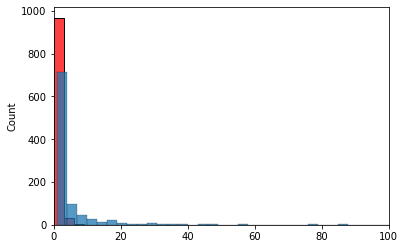

In [13]:
rv = Gamma(alpha, beta)
r = rv.rvs(size=1000)
#plt.hist(tau1[0], alpha=0.8)
sns.histplot(r,  binwidth=3, color = "r")
sns.histplot(lamda[0],  binwidth=3)


plt.xlim(0,100)

% Case 2: synthetic case, internal states
M = 5; % internal states
lambda = linspace(0,1,M+2); lambda([1 end]) = [];
tau2 = sum(exprnd(repmat(lambda,Mdata,1)),2)';
figure(2), histogram(tau2,40,'binlimits',[0 10]);
title('Case 2: synthetic case, internal states');

% Q2: from data tau2 above, can we find estimates of lamda(i), i =
% 1...M above? Maximum-Likelhood estimates? Bayesian estimates?
%
% The likelihood for a sum of exponentially distributed waiting time
% has been discussed here: "Sum of independent exponentials": Problem
% 12 of Chapter I in Feller: An Introduction to Probability Theory and
% its Applications, Volume II. See
% https://people.maths.bris.ac.uk/~mb13434/sumexp.pdf
%
% On a related note: Gong, Y., Mao, Y.-H., Zhang, C., 2012. "Hitting
% time distributions for denumerable birth and death processes" in
% J. Theor. Probab. 25 (4),
% 950--980. https://doi.org/10.1007/s10959-012-0436-1.

# Case 2 

In [54]:
Mdata = 1000
M = 5 # internal states
lamda2 = np.arange(1,6,1)/6
tau2 = np.zeros((1, Mdata))
 
generated_exps = np.zeros((M, Mdata))
i=0
for exp in lamda2:
    generated_exps[i, :] = expon(lamda2[i]).rvs(size=Mdata)
    i+=1
     
tau2 = np.sum(generated_exps, axis = 0)    
 

In [55]:
1/lamda2

array([6. , 3. , 2. , 1.5, 1.2])

In [56]:
generated_exps.mean(axis=1)

array([1.2015052 , 1.36899205, 1.47868028, 1.66328121, 1.80998594])

Text(0.5, 1.0, 'Zoom-in, data $\\tau$ distribution')

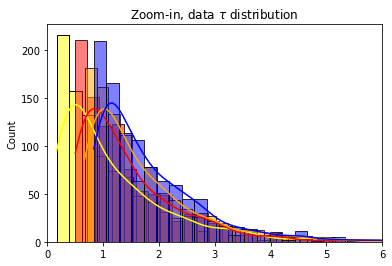

In [57]:
sns.histplot(generated_exps[0, :], color = "yellow", kde=True)
sns.histplot(generated_exps[2, :], color = "r", kde=True)
sns.histplot(generated_exps[3, :], color = "orange", kde=True)
sns.histplot(generated_exps[4, :], color = "b", kde=True)
plt.xlim(0,6)
plt.title(r"Zoom-in, data $\tau$ distribution")

Text(0.5, 1.0, 'Zoom-in, data $\\tau$ distribution')

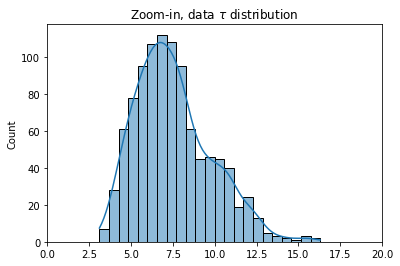

In [58]:
sns.histplot(tau2, kde=True)
plt.xlim(0,20)
plt.title(r"Zoom-in, data $\tau$ distribution")